---

# 🔁 `pandas.pivot()` – Complete & Detailed Notes

---

## 🔍 What is `pivot()`?

`pivot()` reshapes a DataFrame from **long format to wide format** by turning unique values from one column into multiple **column headers**, using other columns as **row indices** and **values**.

### Think of it as the **reverse of `melt()`**.

---

## 🧪 Simple Example

```python
import pandas as pd

df = pd.DataFrame({
    'Name': ['Ali', 'Ali', 'Zain', 'Zain'],
    'Subject': ['Math', 'Science', 'Math', 'Science'],
    'Marks': [85, 75, 90, 80]
})
```

### Long Format:

```
   Name  Subject  Marks
0   Ali    Math      85
1   Ali  Science      75
2  Zain    Math      90
3  Zain  Science      80
```

### Pivoted (Wide Format):

```python
df.pivot(index='Name', columns='Subject', values='Marks')
```

```
Subject  Math  Science
Name                  
Ali        85       75
Zain       90       80
```

---

## 📘 Syntax

```python
DataFrame.pivot(
    index=None,
    columns=None,
    values=None
)
```

---

## 📥 Parameters

| Parameter | Description                          |
| --------- | ------------------------------------ |
| `index`   | Column to use as row labels          |
| `columns` | Column to use to create new columns  |
| `values`  | Column to use to fill the new values |

All 3 parameters must be **column names** in the original DataFrame.

---

## 🧠 Conceptual Flow

```
From this:

| ID | Category | Value |
|----|----------|-------|
| 1  | A        | 10    |
| 1  | B        | 20    |

To this:

| ID | A  | B  |
|----|----|----|
| 1  | 10 | 20 |
```

---

## ⚠️ Important Notes

### 🔸 All combinations of `index` and `columns` **must be unique**!

```python
df.pivot(index='Name', columns='Subject', values='Marks')
```

✅ Works if `(Name, Subject)` pairs are unique.

❌ Fails with `ValueError: Index contains duplicate entries`, if duplicates exist.

---

## 🧯 What if you have duplicates?

Use `pivot_table()` instead:

```python
df.pivot_table(index='Name', columns='Subject', values='Marks', aggfunc='mean')
```

---

## 📚 Real-Life Example

### Input (Long Format):

```python
df = pd.DataFrame({
    'Student': ['Ali', 'Ali', 'Ali', 'Zain', 'Zain'],
    'Year': [2023, 2023, 2024, 2023, 2024],
    'Subject': ['Math', 'English', 'Math', 'Math', 'Math'],
    'Marks': [88, 92, 84, 91, 86]
})
```

### Pivot:

```python
df.pivot(index=['Student', 'Year'], columns='Subject', values='Marks')
```

✅ Output (MultiIndex):

```
Subject         English  Math
Student Year                
Ali     2023      92.0  88.0
        2024       NaN  84.0
Zain    2023       NaN  91.0
        2024       NaN  86.0
```

---

## 🧰 Working with MultiIndex Columns

Pivot often results in MultiIndex on columns if the columns param has multiple levels.

Flatten it:

```python
df.columns = [col if not isinstance(col, tuple) else '_'.join(col).strip() for col in df.columns.values]
df.reset_index(inplace=True)
```

---

## 📊 Use Cases

| Use Case                    | Why Use `pivot()`                            |
| --------------------------- | -------------------------------------------- |
| Unstacking long data        | Converts tidy/long data to wide              |
| Time-series reshaping       | Date/time to columns                         |
| Reporting and dashboards    | Values per category per row                  |
| Machine Learning input prep | Convert categorical/time columns to features |
| Comparative analysis        | Side-by-side feature comparison              |

---

## 🔁 Comparison with Similar Functions

| Function        | Direction                 | Duplicates Allowed | Aggregation |
| --------------- | ------------------------- | ------------------ | ----------- |
| `melt()`        | Wide → Long               | Yes                | ❌           |
| `pivot()`       | Long → Wide               | ❌ (must be unique) | ❌           |
| `pivot_table()` | Long → Wide               | ✅                  | ✅ (aggfunc) |
| `stack()`       | Wide → Long (index level) | ✅                  | ❌           |
| `unstack()`     | Long → Wide (index level) | ✅                  | ❌           |

---

## 🔁 Reverse of `pivot()`?

```python
pd.melt(df, id_vars='Name', var_name='Subject', value_name='Marks')
```

You can recover long format from a pivot using `melt()`.

---

## 🧪 Edge Cases

### 🔸 Duplicates

```python
df = pd.DataFrame({
    'Name': ['Ali', 'Ali'],
    'Subject': ['Math', 'Math'],
    'Marks': [85, 90]
})
df.pivot(index='Name', columns='Subject', values='Marks')
# ❌ Error: duplicate index/column pairs
```

➡️ Use `pivot_table()` with `aggfunc='mean'`, `'sum'`, etc.

---

## 🧯 Missing Values

If not every combination of `index` and `column` exists, you'll get `NaN`:

```python
df = pd.DataFrame({
    'Name': ['Ali', 'Zain'],
    'Subject': ['Math', 'Math'],
    'Marks': [85, 90]
})

df.pivot(index='Name', columns='Subject', values='Marks')
```

If `Zain` doesn’t have a "Science" entry → `NaN`.

---

## 🧰 Flattening a Pivoted Table

```python
pivoted = df.pivot(index='Name', columns='Subject', values='Marks')
pivoted.reset_index(inplace=True)
pivoted.columns.name = None  # remove columns name
```

---

## ✅ Summary of Best Practices

* Use `pivot()` **only** when (index, column) pairs are **unique**
* Use `pivot_table()` when you need **aggregation**
* After pivoting:

  * Use `.reset_index()` to flatten index
  * Use `.fillna()` to handle missing data
* Combine with `.melt()` and `.groupby()` for full reshaping power

---

## 🧠 Final Takeaways

* `pivot()` is like Excel’s **“drag column to row/column area”** in pivot tables
* It's a **pure reshaping** tool (no aggregation)
* Mastering `pivot()`, `melt()`, `stack()`, `unstack()`, and `pivot_table()` gives you full control over tabular data shapes

---



---

## 🔥 `pivot()` vs `pivot_table()` – The Duplicate Problem

### 🔷 Problem: **Duplicate Index-Column Pairs**

#### Jab tum `pivot()` use karte ho, toh ye function expect karta hai:

> **Har combination of `index` and `columns` unique hona chahiye.**

### ❌ Agar duplicate combinations mil gaye, toh error throw karega.

### 🧪 Example:

```python
import pandas as pd

df = pd.DataFrame({
    'Name': ['Ali', 'Ali'],            # Duplicate Name
    'Subject': ['Math', 'Math'],       # Duplicate Subject
    'Marks': [85, 90]
})

df.pivot(index='Name', columns='Subject', values='Marks')
```

### ❌ Output:

```
ValueError: Index contains duplicate entries, cannot reshape
```

### 🔎 Kyun Error Aaya?

Because `pivot()` ko ye samajh nahi aa raha ke:

> "Ali" + "Math" ke liye kis value ko rakhun — 85 ya 90?

Ye confusion avoid karne ke liye `pivot()` sirf **unique combinations** hi allow karta hai.

---

## ✅ Solution: Use `pivot_table()` (supports aggregation)

`pivot_table()` allows duplicates — **aur tum decide kar sakte ho ki duplicates ka kya karna hai**, e.g., **average, sum, max, etc.**

```python
df.pivot_table(index='Name', columns='Subject', values='Marks', aggfunc='mean')
```

### ✅ Output:

```
Subject  Math
Name           
Ali       87.5   ← (85 + 90) / 2
```

### ✅ You can also use:

* `aggfunc='sum'` → 85 + 90 = 175
* `aggfunc='max'` → 90
* `aggfunc='min'` → 85
* `aggfunc=list` → \[85, 90]

---

## 📊 Real-Life Analogy:

Imagine tumhare paas ek class ka result hai:

| Name | Subject | Marks |
| ---- | ------- | ----- |
| Ali  | Math    | 85    |
| Ali  | Math    | 90    |

Ye data **do different tests** ke ho sakte hain. Ab agar tum pivot kar rahe ho and dono ko ek hi cell mein daalna hai, toh:

* `pivot()` confused ho jaata hai 😵
* `pivot_table()` smart hai: "Tum batao — average chahiye ya sab values?"

---

## 📘 Summary: Kab kya use karna chahiye?

| Situation                       | Use               |
| ------------------------------- | ----------------- |
| Unique (index, column) pairs    | `pivot()` ✅       |
| Duplicate (index, column) pairs | `pivot_table()` ✅ |
| Need aggregation                | `pivot_table()` ✅ |
| Just reshape (no aggregation)   | `pivot()` ✅       |

---

## 🧠 Tip: Check for Duplicates Before Pivoting

```python
df.duplicated(subset=['Name', 'Subject']).any()
# Agar True aaya, toh use pivot_table()
```

---

Agar chaho toh mai tumhare liye practice ke liye ek real-world dataset (jaise cricket scores ya semester results) pe `pivot()` aur `pivot_table()` ka live demo bana sakta hoon 🏏📊

Batao, `pivot_table()` par complete notes chahiye next?


### <center> Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
# on a average how much each customer spend ?
df.groupby('sex')[['total_bill']].mean()

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\3630200889.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('sex')[['total_bill']].mean()


,total_bill
sex,
Male,20.744076
Female,18.056897


In [4]:
# also how much male smoker spend on a average vs non smoker
# how much female smoker spend on a average vs non smoker

In [5]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\884363850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()


total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [6]:
# same cheez short , pivot table se ho joyegi by using 3 things, index,columns,values 

df.pivot_table(index='sex',columns='smoker',values='total_bill')

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\3947695972.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill')


smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='sum') # saare values ko add kr denge

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\2137573363.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='sum') # saare values ko add kr denge


smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [8]:
df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='count') # count karne ke liye hota hai

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\2410058640.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='count') # count karne ke liye hota hai


smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [9]:
# all columns together

# Filter numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Pivot table on numeric columns only
pivot = df.pivot_table(index='sex', columns='smoker', values=numeric_cols)

pivot

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\3573512472.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='sex', columns='smoker', values=numeric_cols)


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [10]:
# multidimensional
df.pivot_table(index=['sex','smoker'], columns=['day','time'])

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\1301841597.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'], columns=['day','time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [11]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'])

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\4291615774.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'], columns=['day','time'])


size                                                   tip  \
day                Thur              Fri              Sat       Sun      Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner     Lunch   
sex    smoker                                                                   
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  3.058000   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  2.990000   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  2.437083   

                                                      total_bill         \
day                    Fri              Sat       Sun       Thur          
time          Dinner Lunch Dinner    Dinner    Dinner      Lunch Dinner   
sex    smoker                                                             
Male   Yes       NaN  1.90  3.246  2.879259  3.521333  19.171000    NaN   
       No        NaN   NaN  2.500  3.256563  3.115349  18.486500    NaN   
Female Yes       NaN  2.66  2.700  2.868667  3.500000  19.218571    NaN   
       No        3.0  3.00  3.250  2.724615  3.329286  15.899167  18.78   

                                                        
day                  Fri                Sat        Sun  
time               Lunch  Dinner     Dinner     Dinner  
sex    smoker                                           
Male   Yes     11.386667  25.892  21.837778  26.141333  
       No            NaN  17.475  19.929063  20.403256  
Female Yes     13.260000  12.200  20.266667  16.540000  
       No      15.980000  22.750  19.003846  20.824286

In [12]:
df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={
    'size': 'mean', 'tip' : 'max', 'total_bill' : 'sum'})

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\1804552434.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index=['sex','smoker'], columns=['day','time'], aggfunc={


size                                               tip  \
day                Thur              Fri              Sat       Sun  Thur   
time              Lunch Dinner     Lunch Dinner    Dinner    Dinner Lunch   
sex    smoker                                                               
Male   Yes     2.300000    NaN  1.666667    2.4  2.629630  2.600000  5.00   
       No      2.500000    NaN       NaN    2.0  2.656250  2.883721  6.70   
Female Yes     2.428571    NaN  2.000000    2.0  2.200000  2.500000  5.00   
       No      2.500000    2.0  3.000000    2.0  2.307692  3.071429  5.17   

                                                total_bill                \
day                    Fri           Sat    Sun       Thur           Fri   
time          Dinner Lunch Dinner Dinner Dinner      Lunch Dinner  Lunch   
sex    smoker                                                              
Male   Yes       NaN  2.20   4.73  10.00    6.5     191.71   0.00  34.16   
       No        NaN   NaN   3.50   9.00    6.0     369.73   0.00   0.00   
Female Yes       NaN  3.48   4.30   6.50    4.0     134.53   0.00  39.78   
       No        3.0  3.00   3.25   4.67    5.2     381.58  18.78  15.98   

                                                   
day                     Sat           Sun          
time           Dinner Lunch  Dinner Lunch  Dinner  
sex    smoker                                      
Male   Yes     129.46   0.0  589.62   0.0  392.12  
       No       34.95   0.0  637.73   0.0  877.34  
Female Yes      48.80   0.0  304.00   0.0   66.16  
       No       22.75   0.0  247.05   0.0  291.54

In [13]:
# margins

df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='sum', margins=True)

C:\Users\Lappy\AppData\Local\Temp\ipykernel_7776\2708765830.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='sum', margins=True)


smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [14]:
# plotting  graphs

df = pd.read_csv('expense_data.csv')

In [15]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [16]:
df['Category'].value_counts()

Category
Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: count, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [18]:
df['Date'] = pd.to_datetime(df['Date'])

In [19]:
df['Date']

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [20]:
df['months'] = df['Date'].dt.month_name()
df['months']

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: months, Length: 277, dtype: object

In [21]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,months
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [22]:
df.pivot_table(index='months', columns='Category', values='INR', aggfunc='sum', fill_value=0)

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
months,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,0.0,6440.72,0.0,4800.0,1790.0,0.0,0.0,400.0,513.72,914.0
February,0.0,798.0,0.0,0.0,5579.85,0.0,2808.0,20000.0,0.0,0.0,0.0,1800.00,5078.8
January,1000.0,0.0,0.0,1400.0,9112.51,0.0,4580.0,13178.0,0.0,8000.0,0.0,200.00,2850.0
March,0.0,0.0,0.0,0.0,195.00,0.0,0.0,900.0,0.0,0.0,0.0,0.00,30.0
November,2000.0,0.0,0.0,0.0,3174.40,115.0,0.0,2000.0,3.0,0.0,0.0,0.00,331.0


<Axes: xlabel='months'>

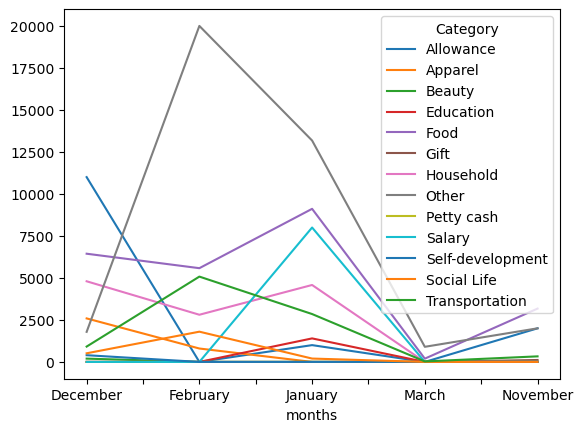

In [23]:
df.pivot_table(index='months', columns='Category', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='months'>

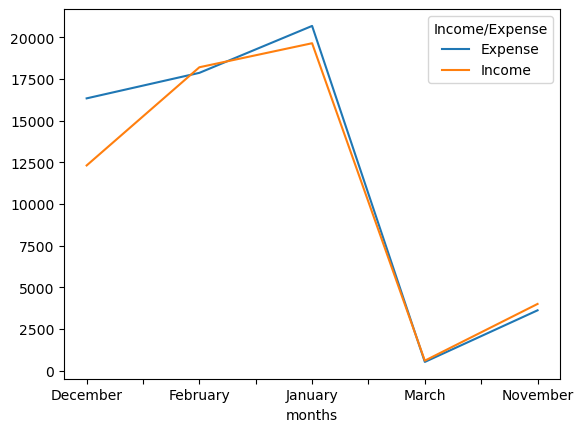

In [24]:
df.pivot_table(index='months', columns='Income/Expense', values='INR', aggfunc='sum', fill_value=0).plot()

<Axes: xlabel='months'>

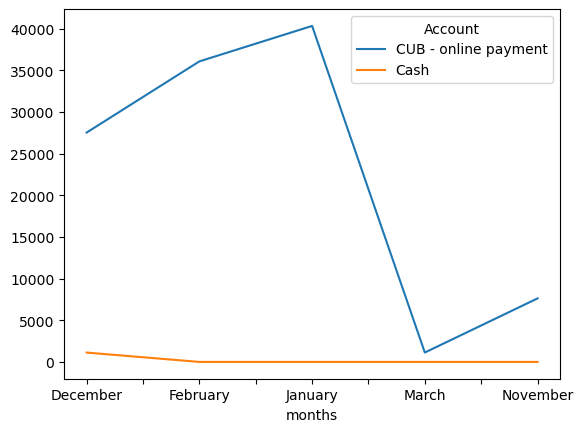

In [25]:
df.pivot_table(index='months', columns='Account', values='INR', aggfunc='sum', fill_value=0).plot()

# 🧠 `pandas.pivot_table()` — Master Guide (Beginner to Expert)

---

## 📌 What is a Pivot Table?

A **pivot table** in pandas is a powerful tool used to **summarize, aggregate, and reshape** data. It converts long (tidy) format data into wide format by:

* Using one column as **index** (rows)
* Another column as **columns** (column headers)
* Another column as **values**
* And applying an **aggregation function** on duplicate combinations

It’s the pandas version of Excel's Pivot Table 📊

---

## 🔍 Syntax

```python
pd.pivot_table(
    data,
    values=None,
    index=None,
    columns=None,
    aggfunc='mean',
    fill_value=None,
    margins=False,
    dropna=True,
    margins_name='All',
    observed=False,
    sort=True
)
```

---

## 🧱 Parameters (Explained Deeply)

| Parameter      | Description                                                                  |
| -------------- | ---------------------------------------------------------------------------- |
| `data`         | The DataFrame to operate on                                                  |
| `values`       | Column(s) to aggregate                                                       |
| `index`        | Column(s) to group as rows                                                   |
| `columns`      | Column(s) to group as columns                                                |
| `aggfunc`      | Aggregation function(s) to apply: `'mean'`, `'sum'`, `'count'`, `list`, etc. |
| `fill_value`   | Replace missing values (`NaN`) with this value                               |
| `margins`      | Add summary row/column (like Excel's total)                                  |
| `dropna`       | If `True`, don’t include columns with all NaNs                               |
| `margins_name` | Name to use for summary totals row/column (default: `'All'`)                 |
| `observed`     | For categorical data – only show observed combinations                       |
| `sort`         | Whether to sort the resulting index/columns                                  |

---

## 🧪 Basic Example

```python
import pandas as pd

df = pd.DataFrame({
    'Name': ['Ali', 'Ali', 'Zain', 'Zain', 'Ali'],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math'],
    'Marks': [85, 75, 90, 80, 95]
})
```

### ➕ Create Pivot Table:

```python
pd.pivot_table(df, index='Name', columns='Subject', values='Marks', aggfunc='mean')
```

### ✅ Output:

```
Subject  Math  Science
Name                  
Ali        90      75
Zain       90      80
```

---

## 🎯 Aggregation Functions (`aggfunc`)

You can use:

* `'mean'` (default)
* `'sum'`
* `'count'`
* `'min'`, `'max'`
* `list`, `set`, `np.std`, custom lambda functions

```python
# Multiple aggregations
pd.pivot_table(df, index='Name', columns='Subject', values='Marks', aggfunc=['mean', 'max'])
```

---

## 🧂 Handling Missing Data (`fill_value`)

If certain `(index, column)` combinations are missing → returns NaN.

Use `fill_value` to replace:

```python
pd.pivot_table(df, index='Name', columns='Subject', values='Marks', fill_value=0)
```

---

## 🧮 Count Without `values`

```python
pd.pivot_table(df, index='Name', columns='Subject', aggfunc='count')
```

You can skip `values` to count how many records exist for each (row, col) combo.

---

## ➕ Totals Row/Column (`margins=True`)

Adds an `'All'` row and/or column with summary values.

```python
pd.pivot_table(df, index='Name', columns='Subject', values='Marks', aggfunc='sum', margins=True)
```

---

## 🔄 Multiple Index or Columns

```python
pd.pivot_table(df, index=['Name', 'Subject'], values='Marks', aggfunc='sum')
```

```python
pd.pivot_table(df, index='Name', columns=['Subject'], values='Marks', aggfunc='sum')
```

---

## 🧰 Flattening MultiIndex

By default, pivot tables create multi-index for rows and columns. You can flatten:

```python
pivot = pd.pivot_table(...)
pivot.columns = ['_'.join(str(i) for i in col).strip() if isinstance(col, tuple) else col for col in pivot.columns.values]
pivot.reset_index(inplace=True)
```

---

## ⚠️ Important Differences from `pivot()`

| Feature            | `pivot()`     | `pivot_table()`                 |
| ------------------ | ------------- | ------------------------------- |
| Duplicate handling | ❌ Error       | ✅ Aggregates using `aggfunc`    |
| Aggregation        | ❌ Not allowed | ✅ Allowed (`mean`, `sum`, etc.) |
| Default aggfunc    | N/A           | `'mean'`                        |
| Missing values     | Returns `NaN` | Can fill using `fill_value`     |
| MultiIndex support | Limited       | Advanced                        |

---

## 🔄 Reverse with `melt()`

You can reverse the reshaped pivot using `melt()`:

```python
pivoted = pd.pivot_table(...)
pd.melt(pivoted.reset_index(), id_vars='Name', value_name='Marks', var_name='Subject')
```

---

## 📚 Real-World Use Case

### 🧑‍🎓 Students Dataset

```python
df = pd.DataFrame({
    'Student': ['Ali', 'Ali', 'Zain', 'Zain', 'Ali'],
    'Semester': ['S1', 'S1', 'S1', 'S1', 'S2'],
    'Subject': ['Math', 'Science', 'Math', 'Science', 'Math'],
    'Marks': [85, 75, 90, 80, 88]
})

pd.pivot_table(df, index=['Student', 'Semester'], columns='Subject', values='Marks', aggfunc='mean', fill_value=0)
```

```
Subject           Math  Science
Student Semester              
Ali     S1          85       75
        S2          88        0
Zain    S1          90       80
```

---

## 🧠 Advanced: Custom Aggregation Function

```python
import numpy as np
pd.pivot_table(df, index='Student', columns='Subject', values='Marks',
               aggfunc=lambda x: np.percentile(x, 75))
```

Use lambda or any numpy function like `np.std`, `np.median`, etc.

---

## 🔍 Edge Case: Multiple Value Columns

```python
df['Grade'] = ['B', 'A', 'A', 'B', 'A']
pd.pivot_table(df, index='Student', columns='Subject', values=['Marks', 'Grade'], aggfunc='first')
```

---

## ✅ Best Practices

| Tip                                             | Why                       |
| ----------------------------------------------- | ------------------------- |
| Use `pivot_table()` over `pivot()` when unsure  | Safer with duplicates     |
| Use `fill_value` to avoid NaNs in reports       | Cleaner output            |
| Use multiple `aggfunc`s to extract more insight | e.g., `['mean', 'count']` |
| Flatten multi-index if exporting to Excel/CSV   | Compatibility             |
| Use `margins=True` to show totals               | Like Excel Pivot Table    |
| Combine with `.melt()` to reshape back          | Full control over form    |

---

## 📊 Visualization Ideas with Pivot Table

Once pivoted:

```python
pivot = pd.pivot_table(...)
pivot.plot(kind='bar')  # Bar chart
pivot.plot(kind='heatmap')  # With seaborn
```

Use pivoted tables for:

* Heatmaps
* Comparison plots
* Multi-line trends

---

## 🧠 Summary Table

| Use Case                     | Solution                              |
| ---------------------------- | ------------------------------------- |
| Handle duplicates            | Use `pivot_table()` with `aggfunc`    |
| Missing value filling        | Use `fill_value`                      |
| Totals like Excel            | Use `margins=True`                    |
| Aggregating multiple columns | Use list in `values`                  |
| Multi-function aggregation   | Use list in `aggfunc`                 |
| Data exploration summary     | `pivot_table(..., aggfunc='count')`   |
| Custom logic on values       | Use `lambda` or `np.percentile`, etc. |

---

## ✅ Practice Challenge for You

Try creating a pivot table from this:

```python
sales_df = pd.DataFrame({
    'Region': ['North', 'North', 'South', 'South', 'East', 'East'],
    'Product': ['A', 'B', 'A', 'B', 'A', 'B'],
    'Sales': [200, 240, 300, 310, 150, 130]
})
```

* Show total sales per region
* Show product-wise sales per region
* Add margins
* Use sum and count both as aggfuncs

---

Would you like a **Jupyter Notebook version** of these examples or a **cheatsheet PDF**?

Also let me know if you're ready to learn `crosstab()` — another super useful summary tool in pandas!


---

## ✅ **Pivot Table Use Karne Ki Pehchaan (Cheat Rule)**

### Jab bhi tumhare paas **"long format"** data ho jisme:

* Multiple **repeated entries** hon (i.e., grouped data)
* Tum **summarize**, **aggregate**, ya **reshape** karna chahte ho
* Tumhe kisi ek ya zyada columns ke basis par **table banana ho** (row × column)

🟢 **Tab pivot table perfect hai!**

---

## 🔍 Step-by-Step Checklist (Ask Yourself):

| Question                                                                         | If Yes → Use Pivot Table |
| -------------------------------------------------------------------------------- | ------------------------ |
| Kya data me **categories repeat** ho rahi hain?                                  | ✅                        |
| Kya tumhe ek **summary table** banana hai?                                       | ✅                        |
| Kya tum **values ka average/sum/count** dekhna chahte ho?                        | ✅                        |
| Kya tum data ko **row × column** format me dekhna chahte ho?                     | ✅                        |
| Kya tum chahte ho ki har **row ek entity** ho, aur har **column ek feature** ho? | ✅                        |

---

## 🎯 Real-World Scenarios — Jab Tumhe Pivot Table Use Karna Chahiye:

### 1. **Students & Marks**

Tumhare paas hai:

| Student | Subject | Marks |
| ------- | ------- | ----- |
| Ali     | Math    | 85    |
| Ali     | Science | 75    |

🟡 Tum chahte ho ki:

* Har student ek row ho
* Har subject ek column
* Aur cell me average ya total marks ho

```python
df.pivot_table(index='Student', columns='Subject', values='Marks', aggfunc='mean')
```

---

### 2. **Sales by Region and Product**

| Region | Product | Sales |
| ------ | ------- | ----- |
| North  | A       | 200   |
| North  | B       | 150   |
| South  | A       | 300   |

🟡 Tum chahte ho:

* Region rows ho
* Product columns
* Aur sales ka total ho

```python
df.pivot_table(index='Region', columns='Product', values='Sales', aggfunc='sum')
```

---

### 3. **Website Traffic**

| Date       | Device  | Visits |
| ---------- | ------- | ------ |
| 2024-01-01 | Mobile  | 100    |
| 2024-01-01 | Desktop | 200    |

🟡 Tum chahte ho:

* Date-wise device usage table

```python
df.pivot_table(index='Date', columns='Device', values='Visits', aggfunc='sum')
```

---

## 🧠 Common Signs You Need a Pivot Table:

| Sign                                       | Meaning         |
| ------------------------------------------ | --------------- |
| Repeated combinations of columns           | Use aggregation |
| Need to analyze by categories (group-wise) | Pivot           |
| Want Excel-style summaries                 | Pivot           |
| Want to create heatmap-style matrix        | Pivot           |

---

## ❌ Jab *Na* Use Karna Ho Pivot Table:

| Situation                                                 | Better Tool               |
| --------------------------------------------------------- | ------------------------- |
| Tum just reshape kar rahe ho                              | Use `pivot()` or `melt()` |
| Tum wide → long ja rahe ho                                | Use `melt()`              |
| Tum cross-tabulation kar rahe ho (without numeric values) | Use `pd.crosstab()`       |

---

## 🔁 Mind Map Summary:

```
Have structured tabular data?
     ↓
Do you want to reshape or summarize?
     ↓
Reshape only (no math)? → Use `pivot()` or `melt()`
     ↓
Summarize or aggregate? → Use `pivot_table()`
     ↓
Want to count frequencies? → Use `pd.crosstab()`
```

---

## 🚀 Final Pro Tip: Practice + Intuition

Jab tum 5–10 real datasets par pivot table use kar loge:

* Tumhara **data intuition** strong ho jayega 💪
* Tum dekhte hi samajh jaoge: *“Isme mujhe pivot banana chahiye!”*

If you want, I can give you:

* 3 practice datasets + tasks
* Tum khud try karo, fir mai check kar dunga ✅

Batao, practice chahiye? 📊


<center> <h2> Vectorized String Operations</h2> </center>

In [26]:
# What are vectorized operations
a = np.array([1,2,3,4])
a * 4

array([ 4,  8, 12, 16])

In [27]:
# problem in vectorized operations in vanilla python

s = ['cat','mat',None,'rat']

[i.startswith('c') for i in s] # None ke upar startswith nhi lagega so kaam ka nhi hai, python yee nhi kar skta 

# 2nd problem, list comprehension are very slow 

AttributeError: 'NoneType' object has no attribute 'startswith'

In [28]:
# How pandas solves this issue?

s = pd.Series(['cat','mat',None,'rat'])
s.str.startswith('c') # s = string accessor


# fast and optimized

0     True
1    False
2     None
3    False
dtype: object

In **pandas**, we use **`.str`** to **access string methods** for a **Series object** that contains text (strings). Since pandas Series are not pure Python strings, you **can’t directly apply string methods like `.lower()`, `.contains()`, etc.** the same way you would on a regular Python string.

Instead, `.str` acts as a **bridge** that lets you use **vectorized string operations** efficiently across all elements in a Series.

---

### ✅ Why `.str` is needed:

Let’s say you have a column in your DataFrame like this:

```python
import pandas as pd

df = pd.DataFrame({
    'name': ['Ali', 'Zain', 'Data Science', 'PYTHON']
})
```

If you try this:

```python
df['name'].lower()
```

You’ll get an error: **`AttributeError: 'Series' object has no attribute 'lower'`**

But if you use:

```python
df['name'].str.lower()
```

You’ll get:

```
0             ali
1            zain
2    data science
3           python
Name: name, dtype: object
```

---

### 🧠 What happens under the hood:

* `.str` returns a special accessor object (called `StringMethods`)
* Then you can call string functions like `.lower()`, `.contains()`, `.replace()`, `.startswith()`, `.split()`, etc.
* All operations are vectorized → fast and optimized (like NumPy)

---

### 💡 Common uses of `.str` in pandas:

| Operation       | Syntax                      | Example                                 |
| --------------- | --------------------------- | --------------------------------------- |
| Lowercase       | `str.lower()`               | `df['col'].str.lower()`                 |
| Check substring | `str.contains('text')`      | `df['col'].str.contains('Ali')`         |
| Replace text    | `str.replace('old', 'new')` | `df['col'].str.replace('2024', '2025')` |
| Split string    | `str.split(' ')`            | `df['col'].str.split(' ')`              |
| String length   | `str.len()`                 | `df['col'].str.len()`                   |
| Starts with     | `str.startswith('A')`       | `df['col'].str.startswith('A')`         |

---

### ⚠️ Note:

* `.str` works **only on Series of strings**
* If any element is not a string (e.g. `NaN` or a number), you may get an error or `NaN` as output
* Use `.astype(str)` before `.str` if the Series has mixed types

```python
df['col'].astype(str).str.lower()
```

---

### ✅ Summary:

We use `.str` in pandas to:

* Apply string methods on each element of a Series
* Perform fast, vectorized string operations
* Handle text data elegantly and efficiently

Let me know if you want a small exercise or more examples 👇


---

## 🔍 Problem kya hai?

Jab hum **pandas** me kisi **DataFrame ya Series** ke column me text (string) data rakhte hain, wo **pure Python string nahi hoti**, balki **Series object** hota hai.

Toh agar tum yeh socho:

```python
df['name'].lower()
```

Ye kaam karega, **toh galat soch rahe ho** ❌
**Error aayega**: `'Series' object has no attribute 'lower'`

---

## 💡 Kyu nahi chalta `.lower()` directly?

Kyuki `.lower()` ek **Python string ka method** hai — aur `df['name']` ek **pandas Series** hai, jo ek column hai jismein multiple strings hote hain.

Tum agar chahte ho ki har naam lowercase ho jaye, toh har element pe `.lower()` lagana hoga.

---

## ✅ Solution: `.str` ka use

`.str` ek **special accessor** hai jo tumhe **har string element par Python string methods lagane deta hai — ek saath, vectorized tarike se!**

### Example:

```python
import pandas as pd

df = pd.DataFrame({
    'name': ['Ali', 'Zain', 'Data Science', 'PYTHON']
})

df['name'].str.lower()
```

### Output:

```
0             ali
1            zain
2    data science
3           python
Name: name, dtype: object
```

✅ Har element pe `.lower()` lag gaya — bina `for` loop ke!

---

## 🔧 `.str` ka kaam kya hai?

Tum samjho `.str` ek **set of string tools** deta hai har ek value ke liye:

### Tum kya kya kar sakte ho:

| Tumhara goal                  | Code                                   |
| ----------------------------- | -------------------------------------- |
| Sabko lowercase banana        | `df['name'].str.lower()`               |
| Sabko uppercase banana        | `df['name'].str.upper()`               |
| "Ali" word check karna        | `df['name'].str.contains('Ali')`       |
| Text replace karna            | `df['name'].str.replace('Data', 'ML')` |
| Pehle ya last character check | `df['name'].str.startswith('A')`       |
| String ka length lena         | `df['name'].str.len()`                 |
| Text ko split karna           | `df['name'].str.split(' ')`            |

---

## ⚠️ Important Notes:

1. Agar column me **NaN ya number** hoga toh error ya `NaN` de sakta hai.
2. Aise me pehle convert karo:

   ```python
   df['col'].astype(str).str.lower()
   ```

---

## 🔁 Python-style loop kyu nahi use karte?

### Bad way (slow):

```python
for name in df['name']:
    print(name.lower())
```

Yeh slow aur inefficient hai pandas ke liye.

### Good way (fast, pandas-style):

```python
df['name'].str.lower()
```

---

## ✅ Summary in simple line:

> **`.str` isliye use hota hai taaki tum ek baar me poore column ke har string par Python-style string methods laga sako, bina loop ke — fast aur efficient tarike se.** ⚡

---


In [29]:
# import titanic

df = pd.read_csv('titanic.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Name'] # ham,e sif yahi column par kaam karenge

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
# Common Functions
# lower/upper/capitalize/title
# len
# strip
df['Name'].str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [32]:
df['Name'].str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [33]:
df['Name'].str.capitalize()

0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [34]:
df['Name'].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [45]:
print(df['Name'].str.len())
print("\n"*3)
print(df['Name'].str.len().max())


0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64




82


In [46]:
df['Name'][df['Name'].str.len() == 82].values[0]  # boolean indexing se 82 length bde name wale bande ko nkila rhe hai

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [ ]:
"        zain                       ".strip()

'zain'

In [38]:
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [39]:
##### split -> get

df['Name'] # this Name column have 3 component Surname, Title , main name (first name, last name)

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [40]:
# we want to make 3 columns
# 1st column will have first name
# 2nd column will have second name
# 3rd column will have title

In [ ]:
df['Name'].str.split(',') # First name comma se separated hai so we split on the comma.

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [70]:
df["lastname"] = df['Name'].str.split(',').str.get(0) # .get method se ham list ke elements ko nikal skte hai.
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,first name,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Owen Harris,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,John Bradley (Florence Briggs Thayer),Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Laina,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Jacques Heath (Lily May Peel),Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,William Henry,Mr.,William Henry


In [77]:
df[['title', 'firstname']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(" ", n=1, expand=True) # complicated logic but i simple we are just splitting and getting the name 

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs.,Jacques Heath (Lily May Peel)
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr.,William Henry


In [78]:
# question => how many mrr and misses are there\

df["title"].value_counts()

title
Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: count, dtype: int64

In [81]:
# replace

# Miss ko french me Mile aur shortform me ms bolte so replace it

df['title'] = df['title'].replace({'Ms.': 'Miss.', 'Mlle.': 'Miss.'})
df["title"].value_counts()

title
Mr.          517
Miss.        185
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Don.           1
Mme.           1
Lady.          1
Sir.           1
Capt.          1
the            1
Jonkheer.      1
Name: count, dtype: int64

In [90]:
# filtering
# startswith/endswith

### Question => find the name whose names start with a

df[df['firstname'].str.startswith('A')]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,Andersson,Mr.,Anders Johan
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,McGowan,Miss.,"Anna ""Annie"""
35,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S,Holverson,Mr.,Alexander Oskar
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.0,2,0,345764,18.0000,NaN,S,Vander Planke,Miss.,Augusta Maria
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN,Icard,Miss.,Amelie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,843,1,1,"Serepeca, Miss. Augusta",female,30.0,0,0,113798,31.0000,NaN,C,Serepeca,Miss.,Augusta
845,846,0,3,"Abbing, Mr. Anthony",male,42.0,0,0,C.A. 5547,7.5500,NaN,S,Abbing,Mr.,Anthony
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Duran y More,Miss.,Asuncion
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,Najib,Miss.,"Adele Kiamie ""Jane"""


In [91]:
df[df['firstname'].str.startswith('A')].count()['firstname']

95

In [89]:
df[df['firstname'].str.endswith('A')].count()['firstname']

2

In [94]:
# isdigit/isalpha

df[df['firstname'].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


> Applying Advance Filtering using Regex

In [99]:
# applying regex
# contains
# search john -> both case

df[df['firstname'].str.contains('john', case=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S,Turpin,Mrs.,William John Robert (Dorothy Ann Wonnacott)
45,46,0,3,"Rogers, Mr. William John",male,NaN,0,0,S.C./A.4. 23567,8.0500,NaN,S,Rogers,Mr.,William John
98,99,1,2,"Doling, Mrs. John T (Ada Julia Bone)",female,34.0,0,1,231919,23.0000,NaN,S,Doling,Mrs.,John T (Ada Julia Bone)
112,113,0,3,"Barton, Mr. David John",male,22.0,0,0,324669,8.0500,NaN,S,Barton,Mr.,David John
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Turpin,Mr.,William John Robert
160,161,0,3,"Cribb, Mr. John Hatfield",male,44.0,0,1,371362,16.1000,NaN,S,Cribb,Mr.,John Hatfield
162,163,0,3,"Bengtsson, Mr. John Viktor",male,26.0,0,0,347068,7.7750,NaN,S,Bengtsson,Mr.,John Viktor
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.5250,NaN,S,Goldsmith,Master.,"Frank John William ""Frankie"""
168,169,0,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,Baumann,Mr.,John D


In [101]:
# find lastnames with start and end char vowel

df[df['lastname'].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C,Uruchurtu,Don.,Manuel E
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mrs.,Josef (Josefine Franchi)
207,208,1,3,"Albimona, Mr. Nassef Cassem",male,26.0,0,0,2699,18.7875,NaN,C,Albimona,Mr.,Nassef Cassem
210,211,0,3,"Ali, Mr. Ahmed",male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S,Ali,Mr.,Ahmed
353,354,0,3,"Arnold-Franchi, Mr. Josef",male,25.0,1,0,349237,17.8000,NaN,S,Arnold-Franchi,Mr.,Josef
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,Artagaveytia,Mr.,Ramon
518,519,1,2,"Angle, Mrs. William A (Florence ""Mary"" Agnes H...",female,36.0,1,0,226875,26.0000,NaN,S,Angle,Mrs.,"William A (Florence ""Mary"" Agnes Hughes)"
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S,Ali,Mr.,William
840,841,0,3,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,Alhomaki,Mr.,Ilmari Rudolf


In [102]:
# find lastnames which not  start and not end char vowel

df[df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr.,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs.,John Bradley (Florence Briggs Thayer)
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss.,Laina
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr.,James
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr.,Timothy J
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall,Mr.,Henry Jr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham,Miss.,Margaret Edith
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Johnston,Miss.,"Catherine Helen ""Carrie"""
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr,Mr.,Karl Howell


In [104]:
# slicing

df['Name'].str[0:4]

0      Brau
1      Cumi
2      Heik
3      Futr
4      Alle
       ... 
886    Mont
887    Grah
888    John
889    Behr
890    Dool
Name: Name, Length: 891, dtype: object

In [106]:
df['Name'].str[0:4:2]

0      Ba
1      Cm
2      Hi
3      Ft
4      Al
       ..
886    Mn
887    Ga
888    Jh
889    Bh
890    Do
Name: Name, Length: 891, dtype: object

In [107]:
df['Name'].str[::-1]

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

In [108]:
a = 'Ali Zain'
a[::-1]

'niaZ ilA'